# Sistema geotérmico de Acoculco

## Geofísica Matemática y Computacional

### Arturo Cruz López

#### 


### Modelo conceptual

Acoculco es un sistema geotérmico que se encuentra en la parte Este de la Faja Volcánica Trans-mexicana. Los registros térmicos de un pozo con 4000 m de profundidad muestra un régimen de transferencia conductivo bajo un gradiente geotérmico.

Se tiene como propósito determinar la transferencia de calor, mediante un modelo 1D, simulando la distribución tiempo-profundidad de la temperatura, mediante el método de diferencias finitas.

Las características del modelo conceptual son las siguientes:

1. Régimen de transferencia de calor por conducción.
2. Se supone una estructura estratificada subterránea, en donde cada capa es isótropa y tiene propiedades constantes.
2. Uso del método de diferencias finitas.
3. Se utiliza, para ello, la resolución de una ecuación por balance de calor.
4. En el modelo, no se consideran fuentes ni sumideros.
5. El régimen es estacionario, es decir, no depende del tiempo.
6. Las temperaturas inicial y final son fijas en los extremos (condiciones de frontera).

$T = $ temperatura

$z = $ profundidad

$\kappa = $ conductividad térmica

$c = $ capacidad calorífica específica (valor experimental dado)

$\rho = $ densidad de masa (valor experimental dado)


### Modelo matemático

La ecuación de balance de calor en 1D, se describe como sigue:

$\frac{\partial{T}}{\partial{t}} = D_{th} \frac{\partial{T^2}}{\partial{z^2}}$

En donde $\frac{\partial{T}}{\partial{t}}$ = 0 y representa la difusividad térmica

entonces,

$ D_{th} \frac{\partial{T^2}}{\partial{z^2}} = 0$

$ D_{th}$ se define como:

$ D_{th}= \frac{\kappa}{\rho c}$

$T = $ temperatura

$z = $ profundidad

$\kappa = $ conductividad térmica

$c = $ capacidad calorífica específica

$\rho = $ densidad de masa

Condiciones de frontera, obtenidas del artículo:

$T_A = $ 15°C (en la superficie 0 m)

$T_B = $ 750°C (a 4000 m bgs)


NOTA: para este caso estacionario es necesario tener en cuenta que $\kappa$ será constante a trozos, ya que simulará los valores que se le asignaran a cada estrato del nuestro modelo físico 

### Modelo numérico

Se considera la ec. de Poisson con $D_{th}$ variable y condiciones de frontera tipo Dirichlet:


$\frac{d}{dx}(Dth{\frac{du}{dx}})=f$ con $Dth=Dth(x)$

$g=Dth{\frac{du}{dx}}$

${\frac{d}{dx}}(Dth{\frac{du}{dx}}) = \frac{dg}{dx}$

$\frac{du}{dx}={\frac{Dth_{i+\frac{1}{2}}-Dth_{i-\frac{1}{2}}}{h}}$ (en i)

$Dth\frac{du}{dx}=Dth_{i+\frac{1}{2}} {{\frac{u_{i+1}-u_i}{h}}}$ (en $i+\frac{1}{2}$)

$Dth\frac{du}{dx}=Dth_{i+\frac{1}{2}} {{\frac{-u_{i-1}+u_i}{h}}}$ (en $i-\frac{1}{2}$)

$\begin{bmatrix}{-(Dth_{1 + \frac{1}{2}} + Dth_{1 - \frac{1}{2}})} & {Dth_{1 + \frac{1}{2}}} & {0} & {0} & \cdots & {0}\\ {k_{2 - \frac{1}{2}}} & {-(Dth_{2 + \frac{1}{2}} + Dth_{2 - \frac{1}{2}})} & {Dth_{2 + \frac{1}{2}}} & {0} & \cdots & {0}\\ {0} & {k_{3 - \frac{1}{2}}} & {-(Dth_{3 + \frac{1}{2}} + k_{3 - \frac{1}{2}})} & {Dth_{3 + \frac{1}{2}}} & \cdots & {0}\\ \vdots & \ddots & \ddots & \ddots & \ddots & \vdots\\ {0} & \cdots & \cdots & \cdots & {-(Dth_{N + \frac{1}{2}} + Dth_{N - \frac{1}{2}})} & {Dth_{N + \frac{1}{2}}}\\ {0} & \cdots & \cdots & \cdots & {Dth_{N - \frac{1}{2}} } & {-(Dth_{N + \frac{1}{2}} + Dth_{N - \frac{1}{2}})}\end{bmatrix} = A $

$\begin{equation}
\begin{pmatrix}
u_1 \\
u_2 \\
u_3 \\
\vdots \\
u_{N-1}\\
u_{N}
\end{pmatrix}
\end{equation}$ = $U_{N}$


$\frac{1}{h^2}$
$\begin{equation}
\begin{pmatrix}
u_1 \\
u_2 \\
u_3 \\
\vdots \\
u_{N-1}\\
u_{N}
\end{pmatrix}
\end{equation}$ + 
$\begin{equation}
\begin{pmatrix}
-Dth_{1-\frac{1}{2}} A \\
0 \\
0 \\
\vdots \\
\vdots\\
-Dth_{N+\frac{1}{2}} B
\end{pmatrix}
\end{equation}$=
$b_{N}$

Promedio aritmético

$Dth_{i+{\frac{1}{2}}} = {\frac{Dth_{i+1}+Dth_i}{2}}$ 

$Dth_{i-{\frac{1}{2}}} = {\frac{Dth_{i-1}+Dth_i}{2}}$ 

Media armónica

$Dth_{i+{\frac{1}{2}}} = {\frac{2k_{i+1}Dth_i}{Dth_{i+1}+k_i}}$ 

$Dth_{i-{\frac{1}{2}}} = {\frac{2k_{i-1}Dth_i}{Dth_{i-1}+k_i}}$ 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fdm_1D import harmonicMean, arithmeticMean, Laplaciano1D, calcDth


Datos del problema 
   depth1  depth2     k     cp     rho
0       0      50  1.84  840.0  2120.0
1      50     250  1.41  840.0  2340.0
2     250     400  1.36  840.0  2300.0
3     400     600  1.44  840.0  2300.0
4     600     800  1.46  840.0  2290.0
5     800    1000  1.68  840.0  2700.0
6    1000    1500  1.84  890.0  2700.0
7    1500    1900  1.66  890.0  2360.0
8    1900    4000  2.10  950.0  2760.0

 Dth : 
0    1.033243e-06
1    7.173382e-07
2    7.039337e-07
3    7.453416e-07
4    7.589936e-07
5    7.407407e-07
6    7.657095e-07
7    7.903257e-07
8    8.009153e-07
dtype: float64

Datos para la solución numérica usando FD
 dx =       50.0 [m] 
 L  =     4000.0 [m] 
 N  =       79

z shape = (81,) 
[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900. 1950. 2000. 2050. 2100. 2150. 2200. 2250. 230

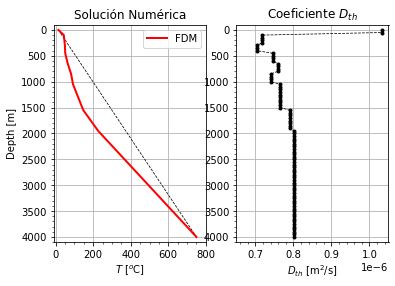

In [2]:
#
# Datos físicos del problema
#
Ttop = 15   # Temperatura en la superficie
Tbot = 750  # Temperatura a 4000 m
L = 4000.0  # Profundidad máxima
data = pd.read_csv('phys_dat.csv') # Lectura de datos: k, cp, rho
Dth_data = data['k'] / (data['rho']*data['cp']) # Cálculo del coeficiente Dth

print('\nDatos del problema \n{}'.format(data))
print('\n Dth : \n{}'.format(Dth_data))
#input('Presiona <enter>')
#
# Datos para la solución numérica por diferencias finitas
#
N = 79                      # Número de incógnitas
dx = L / (N+1)              # Distancia entre nodos
z = np.linspace(0, L, N+2)  # Coordenada z de la profundidad

print('\nDatos para la solución numérica usando FD')
print(' dx = {:10.1f} [m] \n L  = {:10.1f} [m] \n N  = {:8d}'.format(dx, L, N))
print('\nz shape = {} \n{}'.format(z.shape,z))
#input('Presiona <enter>')
#
# Vector con el valor del coeficiente dependiendo de la profundidad 
#
Dth = calcDth(Dth_data, z, N)
        
print('\nCoeficiente en los puntos de la simulación: \n D_th shape = {} \n{}'.format(Dth.shape, Dth))
#
# SOLUCIÓN USANDO DIFERENCIAS FINITAS
#
# Definición del sistema lineal de N x N
#
gamma = Dth / dx**2
f = np.zeros(N)            # RHS
A = Laplaciano1D(N, gamma) # Matriz del sistema
#A = Laplaciano1D(N, gamma, harmonicMean) # Matriz del sistema
#A = Laplaciano1D(N, gamma, arithmeticMean) # Matriz del sistema

print('\nGamma shape = {} \nf shape = {}, A shape = {}'.format(gamma.shape, f.shape, A.shape))
#
# Arreglo para la solución
#
T = np.zeros(N+2)
#
# Aplicación de las condiciones de frontera tipo Dirichlet.
#
T[0] = Ttop
T[N+1] = Tbot 
f[0] -= Ttop * gamma[0]
f[N-1] -= Tbot * gamma[N+1]
#
# Solución del sistema lineal
#
T[1:N+1] = np.linalg.solve(A,f)

print('\nSolución T shape = {} \n{}'.format(T.shape, T))
#
# GRAFICACIÓN
#
ax1 = plt.subplot(121)
plt.plot(T,z, 'r-', lw=2.0, label='FDM', zorder=10)
plt.plot([T[0], T[-1]], [z[0], z[-1]], '--', lw=0.75, c='k' )
plt.ylim(4100,-100)
plt.xlim(-10,800)
plt.title('Solución Numérica')
plt.xlabel('$T$ [$^o$C]')
plt.ylabel('Depth [m]')
plt.minorticks_on()
plt.legend()
plt.grid()

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(Dth, z, '.--', lw=0.75, c='k')
plt.xlabel('$D_{th}$ [m$^2$/s]')
plt.xlim(0.65e-6,1.05e-6)
plt.minorticks_on()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title('Coeficiente $D_{th}$')
plt.grid()

plt.subplots_adjust(hspace=1.0)

plt.show()

# A continuación se hiceron pruebas en donde se cambian los parametros que estan en el modulo 

### Para casos donde N es muy pequeña

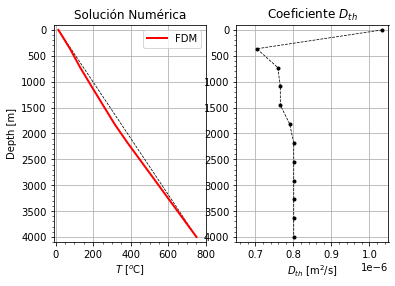

In [3]:
Ttop = 15   # Temperatura en la superficie
Tbot = 750  # Temperatura a 4000 m
L = 4000.0  # Profundidad máxima
data = pd.read_csv('phys_dat.csv') # Lectura de datos: k, cp, rho
Dth_data = data['k'] / (data['rho']*data['cp']) # Cálculo del coeficiente Dth

# print('\nDatos del problema \n{}'.format(data))
# print('\n Dth : \n{}'.format(Dth_data))
#input('Presiona <enter>')
#
# Datos para la solución numérica por diferencias finitas
#
N = 10                      # Número de incógnitas
dx = L / (N+1)              # Distancia entre nodos
z = np.linspace(0, L, N+2)  # Coordenada z de la profundidad

# print('\nDatos para la solución numérica usando FD')
# print(' dx = {:10.1f} [m] \n L  = {:10.1f} [m] \n N  = {:8d}'.format(dx, L, N))
# print('\nz shape = {} \n{}'.format(z.shape,z))
#input('Presiona <enter>')
#
# Vector con el valor del coeficiente dependiendo de la profundidad 
#
Dth = calcDth(Dth_data, z, N)
        
#print('\nCoeficiente en los puntos de la simulación: \n D_th shape = {} \n{}'.format(Dth.shape, Dth))
#
# SOLUCIÓN USANDO DIFERENCIAS FINITAS
#
# Definición del sistema lineal de N x N
#
gamma = Dth / dx**2
f = np.zeros(N)            # RHS
A = Laplaciano1D(N, gamma) # Matriz del sistema
#A = Laplaciano1D(N, gamma, harmonicMean) # Matriz del sistema
#A = Laplaciano1D(N, gamma, arithmeticMean) # Matriz del sistema

#print('\nGamma shape = {} \nf shape = {}, A shape = {}'.format(gamma.shape, f.shape, A.shape))
#
# Arreglo para la solución
#
T = np.zeros(N+2)
#
# Aplicación de las condiciones de frontera tipo Dirichlet.
#
T[0] = Ttop
T[N+1] = Tbot 
f[0] -= Ttop * gamma[0]
f[N-1] -= Tbot * gamma[N+1]
#
# Solución del sistema lineal
#
T[1:N+1] = np.linalg.solve(A,f)

#print('\nSolución T shape = {} \n{}'.format(T.shape, T))
#
# GRAFICACIÓN
#
ax1 = plt.subplot(121)
plt.plot(T,z, 'r-', lw=2.0, label='FDM', zorder=10)
plt.plot([T[0], T[-1]], [z[0], z[-1]], '--', lw=0.75, c='k' )
plt.ylim(4100,-100)
plt.xlim(-10,800)
plt.title('Solución Numérica')
plt.xlabel('$T$ [$^o$C]')
plt.ylabel('Depth [m]')
plt.minorticks_on()
plt.legend()
plt.grid()

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(Dth, z, '.--', lw=0.75, c='k')
plt.xlabel('$D_{th}$ [m$^2$/s]')
plt.xlim(0.65e-6,1.05e-6)
plt.minorticks_on()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title('Coeficiente $D_{th}$')
plt.grid()

plt.subplots_adjust(hspace=1.0)

plt.show()

### Para casos donde N es muy grande

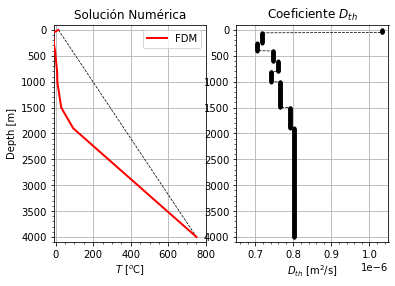

In [4]:
Ttop = 15   # Temperatura en la superficie
Tbot = 750  # Temperatura a 4000 m
L = 4000.0  # Profundidad máxima
data = pd.read_csv('phys_dat.csv') # Lectura de datos: k, cp, rho
Dth_data = data['k'] / (data['rho']*data['cp']) # Cálculo del coeficiente Dth

# print('\nDatos del problema \n{}'.format(data))
# print('\n Dth : \n{}'.format(Dth_data))
#input('Presiona <enter>')
#
# Datos para la solución numérica por diferencias finitas
#
N = 500                      # Número de incógnitas
dx = L / (N+1)              # Distancia entre nodos
z = np.linspace(0, L, N+2)  # Coordenada z de la profundidad

# print('\nDatos para la solución numérica usando FD')
# print(' dx = {:10.1f} [m] \n L  = {:10.1f} [m] \n N  = {:8d}'.format(dx, L, N))
# print('\nz shape = {} \n{}'.format(z.shape,z))
#input('Presiona <enter>')
#
# Vector con el valor del coeficiente dependiendo de la profundidad 
#
Dth = calcDth(Dth_data, z, N)
        
#print('\nCoeficiente en los puntos de la simulación: \n D_th shape = {} \n{}'.format(Dth.shape, Dth))
#
# SOLUCIÓN USANDO DIFERENCIAS FINITAS
#
# Definición del sistema lineal de N x N
#
gamma = Dth / dx**2
f = np.zeros(N)            # RHS
A = Laplaciano1D(N, gamma) # Matriz del sistema
#A = Laplaciano1D(N, gamma, harmonicMean) # Matriz del sistema
#A = Laplaciano1D(N, gamma, arithmeticMean) # Matriz del sistema

#print('\nGamma shape = {} \nf shape = {}, A shape = {}'.format(gamma.shape, f.shape, A.shape))
#
# Arreglo para la solución
#
T = np.zeros(N+2)
#
# Aplicación de las condiciones de frontera tipo Dirichlet.
#
T[0] = Ttop
T[N+1] = Tbot 
f[0] -= Ttop * gamma[0]
f[N-1] -= Tbot * gamma[N+1]
#
# Solución del sistema lineal
#
T[1:N+1] = np.linalg.solve(A,f)

#print('\nSolución T shape = {} \n{}'.format(T.shape, T))
#
# GRAFICACIÓN
#
ax1 = plt.subplot(121)
plt.plot(T,z, 'r-', lw=2.0, label='FDM', zorder=10)
plt.plot([T[0], T[-1]], [z[0], z[-1]], '--', lw=0.75, c='k' )
plt.ylim(4100,-100)
plt.xlim(-10,800)
plt.title('Solución Numérica')
plt.xlabel('$T$ [$^o$C]')
plt.ylabel('Depth [m]')
plt.minorticks_on()
plt.legend()
plt.grid()

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(Dth, z, '.--', lw=0.75, c='k')
plt.xlabel('$D_{th}$ [m$^2$/s]')
plt.xlim(0.65e-6,1.05e-6)
plt.minorticks_on()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title('Coeficiente $D_{th}$')
plt.grid()

plt.subplots_adjust(hspace=1.0)

plt.show()

Cabe resaltar que la solución numérica mostrada la cual es bastante similar a la del artículo se logró con 79 incognitas  (nodos) en los que se quería calcular la temperatura, ya que al utilizar una cantidad mayor o menor pero que sea significativa con respecto a la de 79, la grafica de la solución numerica cambiará, tal es el caso que para valores muy altos de nodos se produce una respuesta diferente a los reales por  motivos asociados a la precisión y capacidad computacional de la computudora, mientras que el déficit de nodos, se produce una respuesta carente de datos para hacer una buena estimación al modelado de capas que conforman nuestro modelo real de Acoculco.

### Implementando otra funcion que viene en el modulo para comprobar que realmente la funcion que utilizamos "Laplaciano1D" nos  brinda una mejor respuesta a la esperada en el articulo

#### A continuación se mostrará como se comporta la respuesta Numérica y la gráfica del coeficiente Dth, para ello se utilizo el mismo numero de nodos




Gamma shape = (502,) 
f shape = (500,), A shape = (500, 500)

Solución T shape = (502,) 
[ 15.          16.10872045  17.21744089  18.32616134  19.43488178
  20.54360223  21.65232268  23.00517526  24.60215999  26.19914472
  27.79612945  29.39311418  30.99009891  32.58708364  34.18406837
  35.7810531   37.37803783  38.97502256  40.57200729  42.16899202
  43.76597675  45.36296148  46.9599462   48.55693093  50.15391566
  51.75090039  53.34788512  54.94486985  56.54185458  58.13883931
  59.73582404  61.33280877  62.94499858  64.57239346  66.19978834
  67.82718323  69.45457811  71.08197299  72.70936788  74.33676276
  75.96415764  77.59155253  79.21894741  80.84634229  82.47373718
  84.10113206  85.72852694  87.35592183  88.98331671  90.61071159
  92.23810648  93.82029595  95.35728     96.89426406  98.43124812
  99.96823217 101.50521623 103.04220029 104.57918434 106.1161684
 107.65315246 109.19013651 110.72712057 112.26410463 113.80108868
 115.33807274 116.8750568  118.41204085 119.94902491 

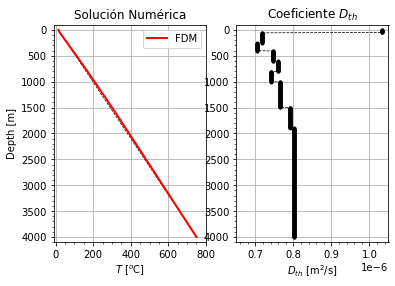

In [5]:
#*********** Para la función de MEDIA ARMONICA****************
#
# SOLUCIÓN USANDO DIFERENCIAS FINITAS
#
# Definición del sistema lineal de N x N
#
gamma = Dth / dx**2
f = np.zeros(N)            # RHS
#A = Laplaciano1D(N, gamma) # Matriz del sistema
A = Laplaciano1D(N, gamma, harmonicMean) # Matriz del sistema
#A = Laplaciano1D(N, gamma, arithmeticMean) # Matriz del sistema

print('\nGamma shape = {} \nf shape = {}, A shape = {}'.format(gamma.shape, f.shape, A.shape))
#
# Arreglo para la solución
#
T = np.zeros(N+2)
#
# Aplicación de las condiciones de frontera tipo Dirichlet.
#
T[0] = Ttop
T[N+1] = Tbot 
f[0] -= Ttop * gamma[0]
f[N-1] -= Tbot * gamma[N+1]
#
# Solución del sistema lineal
#
T[1:N+1] = np.linalg.solve(A,f)

print('\nSolución T shape = {} \n{}'.format(T.shape, T))
#
# GRAFICACIÓN
#
ax1 = plt.subplot(121)
plt.plot(T,z, 'r-', lw=2.0, label='FDM', zorder=10)
plt.plot([T[0], T[-1]], [z[0], z[-1]], '--', lw=0.75, c='k' )
plt.ylim(4100,-100)
plt.xlim(-10,800)
plt.title('Solución Numérica')
plt.xlabel('$T$ [$^o$C]')
plt.ylabel('Depth [m]')
plt.minorticks_on()
plt.legend()
plt.grid()

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(Dth, z, '.--', lw=0.75, c='k')
plt.xlabel('$D_{th}$ [m$^2$/s]')
plt.xlim(0.65e-6,1.05e-6)
plt.minorticks_on()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title('Coeficiente $D_{th}$')
plt.grid()

plt.subplots_adjust(hspace=1.0)

plt.show()


Gamma shape = (502,) 
f shape = (500,), A shape = (500, 500)

Solución T shape = (502,) 
[ 15.          16.10879088  17.21758177  18.32637265  19.43516354
  20.54395442  21.65274531  22.96162561  24.5587118   26.15579799
  27.75288418  29.34997037  30.94705655  32.54414274  34.14122893
  35.73831512  37.3354013   38.93248749  40.52957368  42.12665987
  43.72374605  45.32083224  46.91791843  48.51500462  50.11209081
  51.70917699  53.30626318  54.90334937  56.50043556  58.09752174
  59.69460793  61.29169412  62.90384294  64.53134121  66.15883949
  67.78633776  69.41383603  71.04133431  72.66883258  74.29633085
  75.92382913  77.5513274   79.17882568  80.80632395  82.43382222
  84.0613205   85.68881877  87.31631705  88.94381532  90.57131359
  92.19881187  93.77981019  95.31689189  96.8539736   98.3910553
  99.928137   101.46521871 103.00230041 104.53938211 106.07646382
 107.61354552 109.15062722 110.68770892 112.22479063 113.76187233
 115.29895403 116.83603574 118.37311744 119.91019914 

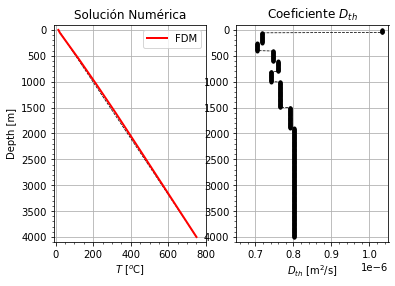

In [6]:
#*********** Para la función de PROMEDIO ARITMÉTICO****************
#
# SOLUCIÓN USANDO DIFERENCIAS FINITAS
#
# Definición del sistema lineal de N x N
#
gamma = Dth / dx**2
f = np.zeros(N)            # RHS
#A = Laplaciano1D(N, gamma) # Matriz del sistema
#A = Laplaciano1D(N, gamma, harmonicMean) # Matriz del sistema
A = Laplaciano1D(N, gamma, arithmeticMean) # Matriz del sistema

print('\nGamma shape = {} \nf shape = {}, A shape = {}'.format(gamma.shape, f.shape, A.shape))
#
# Arreglo para la solución
#
T = np.zeros(N+2)
#
# Aplicación de las condiciones de frontera tipo Dirichlet.
#
T[0] = Ttop
T[N+1] = Tbot 
f[0] -= Ttop * gamma[0]
f[N-1] -= Tbot * gamma[N+1]
#
# Solución del sistema lineal
#
T[1:N+1] = np.linalg.solve(A,f)

print('\nSolución T shape = {} \n{}'.format(T.shape, T))
#
# GRAFICACIÓN
#
ax1 = plt.subplot(121)
plt.plot(T,z, 'r-', lw=2.0, label='FDM', zorder=10)
plt.plot([T[0], T[-1]], [z[0], z[-1]], '--', lw=0.75, c='k' )
plt.ylim(4100,-100)
plt.xlim(-10,800)
plt.title('Solución Numérica')
plt.xlabel('$T$ [$^o$C]')
plt.ylabel('Depth [m]')
plt.minorticks_on()
plt.legend()
plt.grid()

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(Dth, z, '.--', lw=0.75, c='k')
plt.xlabel('$D_{th}$ [m$^2$/s]')
plt.xlim(0.65e-6,1.05e-6)
plt.minorticks_on()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title('Coeficiente $D_{th}$')
plt.grid()

plt.subplots_adjust(hspace=1.0)

plt.show()

Por lo tanto, a pesar de ser el mismo numero de incognitas que se empleo en el primer ejercico, se tiene una respuesta diferente en la solución numérica empleando la funcion de media armónica y el promedio aritmético, la cual hace que la matriz tome a kappa como constante, además de que se suaviza la funcion en ambos casos y por eso se pierde esa aproximación real que cuando se toman los valores en tiempo real, como lo fue en este artículo 